# STA 141B: Homework 2

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:Man

Last Name: Pan

Student ID: 914656278

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>  We say that these numbers constitute the red, green, and blue *channels* of the image.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [1]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

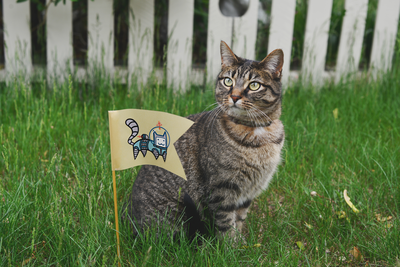

In [2]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [3]:
import numpy as np
cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [4]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [1]:
from PIL import Image
import numpy as np
cat_img = Image.open("F:/study/Study material/141B/141B/hw2/cat.png")
cat = np.array(cat_img)
print(cat.shape)

(267, 400, 3)


The cat array has three dimensions.400 represents the width, and 267 repesents height. For each pixel there are 3 numbers to represent the color channel.

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

In [2]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

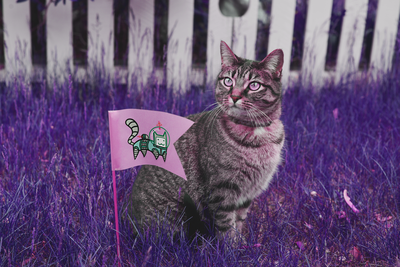

In [3]:
cat_new=cat.copy()
cat_new[:,:,1] = cat_new[:,:,2]
cat_new[:,:,2]=cat[:,:,1]
as_image(cat_new)

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

Since .copy() create a new variable to store cat array. If we don't use .copy(), we will change the original array of cat. In order to keep the original array, we can make changes on the new array.

__Exercise 1.4.__ Flip the blue color channel from left to right. This means that the blue channel values should be swapped such that the $(i,j)$th pixel swapes the blue value with the $(n-i,j)$th pixel values if the image is $n$ pixels wide. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

In [4]:
cat_lr=cat.copy()

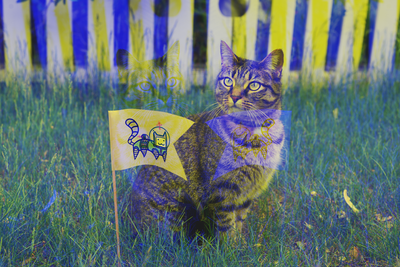

In [5]:
x=cat_lr[:,:,2]
for i in range(cat.shape[0]):
    for j in range(cat.shape[1]):
        x[i,j]=x[i,399-j]
for i in range(cat.shape[0]):
    for j in range(cat.shape[1]):        
        x[i,399-j]=cat[:,:,1][i,j]
cat_lr[:,:,2]=x
as_image(cat_lr)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [6]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [4.52966162 2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [7]:
cat_svd=cat.copy()

In [8]:
def svd(x, q):
    """ SVD decompose matrix.
    
    Args:
        x (ndarray): The array of pixels.
        q: Eliminate all but the first q columns of  V.
        
    Returns:
        x_v:A principal component matrix XVq
        v_q:Transpose of basis matrix.
        x_hat:Approximation of original matrix x.
    """
    u, d, vt = np.linalg.svd(x)
    v_q=vt.T
    v_q=v_q[:, 0:q]
    x_v=x.dot(v_q)
    x_hat=x_v.dot(v_q.T)
    return (x_v,v_q,x_hat)

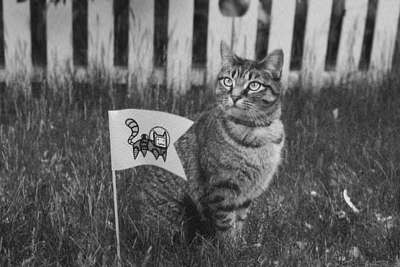

In [9]:
as_image(svd(cat_svd[:, :, 0], 100)[2])

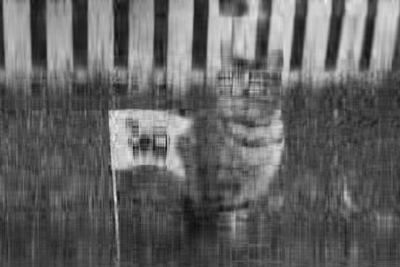

In [10]:
as_image(svd(cat_svd[:, :, 0], 15)[2])

The smallest number of terms is 15 when the cat is still recognizable. It means that when we get 6 or above 6 terms of basis vectors, we can still recognize the cat.

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? What is minimal amount of data necessary to store in order to reconstruct the approximation $\hat X$.  How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [11]:
original=cat_svd[:,:,0].nbytes
print(original)

106800


Cat image uses 106800 bytes.

In [12]:
sum_value=0
for i in range(0,2):
    shape=svd(cat_svd[:, :, 0], 15)[i].shape
    sum_value=sum_value+shape[0]*shape[1]
print(sum_value)

10005


In [13]:
sum_byte=0
for i in range(0,2):
    sum_byte=sum_byte+svd(cat_svd[:, :, 0], 15)[i].nbytes
print(sum_byte)

80040


If the cat is still recognizable, q is 15, in this case, the minimal number of data to store is 10005.
In general, the number of minimal value is (n+p)*q.
And also in order to approximate matrix, we have to sotre basis matrix and principle component matrix. If we claculate the minimal bytes to store, it will be the sum of these two matrices' bytes. So, for bytes, minimal amount of number to reconstruct the matrix is 80040. It is reasonable, beacuse for one number, it will take 8 bytes.

In [14]:
sum_byte=0
for i in range(0,2):
    sum_byte=sum_byte+svd(cat_svd[:, :, 0], 10)[i].nbytes
print(sum_byte)

53360


The compressed version use when 10 terms are kept uses 53360 bytes.

In [15]:
percentage=sum_byte/original
print(percentage)

0.49962546816479403


The compressed one just uses 49.96% bytes of the original one.

## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [16]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[11.+0.        j -1.+0.        j]
 [-1.+0.        j -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [17]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[0., 2., 3.],
       [3., 2., 1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [18]:
# Zero the coefficient in the bottom right corner.
x_coef[:, 1:] = 0
x_coef[1:, :] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[11.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]] 
x approx is:
 [[1.83333333 1.83333333 1.83333333]
 [1.83333333 1.83333333 1.83333333]]


As you can see, for a matrix this small it is hard for this procedure to give a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out the last $k$ rows and columns of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [19]:
cat_fft=cat.copy()

In [20]:
def FFT (x,k):
    """FFT decompose matrix.
    
    Args:
        x (ndarray): The array of pixels.
        k: Zeroing-out the last k rows and columns of matrix.
        
    Returns:
        x_coef: Coefficient matrix after zeroing-out.
        x.shape: Dimension of matrix.
    """
    x_coef = np.fft.rfft2(x)
    x_coef[:, -k:] = 0
    x_coef[-k:, :] = 0
    return(x_coef,x.shape)

In [21]:
def app_x(x,k):
    """Approximate matrix x.
    
    Args:
        x (ndarray): The array of pixels.
        k: Zeroing-out last k rows and columns of matrix.
        
    Returns:
        x_app: Aprroximated matrix.
    """
    x_app=np.fft.irfft2(FFT(x,k)[0],FFT(x,k)[1])
    return x_app

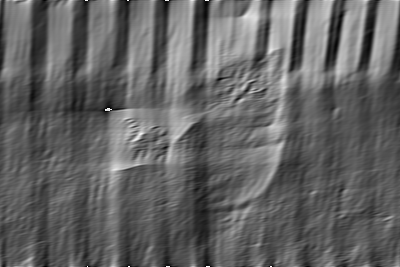

In [22]:
as_image(app_x(cat_fft[:,:,0],140))

The largest number of terms is 140 when the cat is still recognizable. 

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

Since for these two methods, the way of deleting is different. Smaller q is, the picture will be more vague, on the contrary, larger k is, the picture will be more vague. We can not compare these two methods in the same q. But as for coefficient matrix is 267*201, we can make the shape of coefficient matrix and principle component matrix the same, so that we can compare these two methods.

In [23]:
coef=np.complex128(FFT(cat_fft[:,:,0],181)[0])
shape=np.uint64(FFT(cat_fft[:,:,0],181)[1])
zero_m=np.complex128(coef[:,-181:])
zero_n=np.complex128(coef[-181:,:])
zero_x=np.complex128(coef[-181:,-181:])
fft_bytes=coef.nbytes+shape.nbytes-zero_m.nbytes-zero_n.nbytes+zero_x.nbytes
print(fft_bytes)

27536


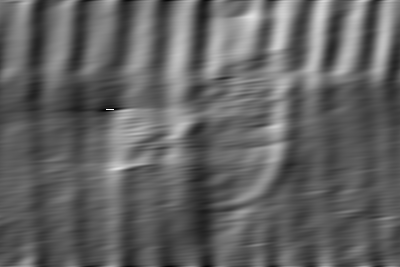

In [24]:
as_image(app_x(cat_fft[:,:,0],181))

In [25]:
sum_byte=0
for i in range(0,2):
    sum_byte=sum_byte+svd(cat_svd[:, :, 0], 20)[i].nbytes
print(sum_byte)

106720


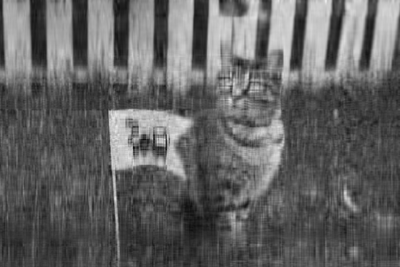

In [26]:
as_image(svd(cat_svd[:, :, 0], 20)[2])

In [27]:
coef=np.complex128(FFT(cat_fft[:,:,0],186)[0])
shape=np.uint64(FFT(cat_fft[:,:,0],186)[1])
zero_m=np.complex128(coef[:,-186:])
zero_n=np.complex128(coef[-186:,:])
zero_x=np.complex128(coef[-186:,-186:])
fft_bytes=coef.nbytes+shape.nbytes-zero_m.nbytes-zero_n.nbytes+zero_x.nbytes
print(fft_bytes)

19456


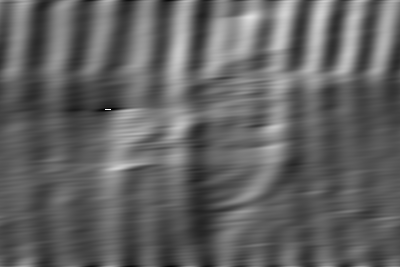

In [28]:
as_image(app_x(cat_fft[:,:,0],186))

In [29]:
sum_byte=0
for i in range(0,2):
    sum_byte=sum_byte+svd(cat_svd[:, :, 0], 15)[i].nbytes
print(sum_byte)

80040


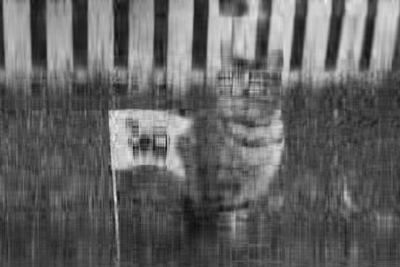

In [30]:
as_image(svd(cat_svd[:, :, 0], 15)[2])

From the four pictures, we can see that SVD will make picure more distinct when the dimension of principal component matrix and coefficient matrix whose non zero elements is the same. This is because the basis is on original matrix X. So by comparison, we can find that SVD works better for dimension reduction. It means that SVD can get a good approximation to get more clear picture.  
On the contrary, from above calculation, FFT always has smaller storage for the bytes than SVD. We can conclude that FFT works better for file compression, because its basis is not depend on the original matrix X.